### Iris com Perceptron

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()

In [7]:
X = iris.data[:, [2, 3]]
y = iris.target
print('Labels: ', np.unique(y))

Labels:  [0 1 2]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print('Contagem de labels no y: ', np.bincount(y))
print('Contagem de labels no y_train: ', np.bincount(y_train))
print('Contagem de labels no y_test: ', np.bincount(y_test))

Contagem de labels no y:  [50 50 50]
Contagem de labels no y_train:  [35 35 35]
Contagem de labels no y_test:  [15 15 15]


In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
y_pred = ppn.predict(X_test_std)
print('Exemplos classificados errados: %d' %(y_test != y_pred).sum())
print('Acurácia: %.3f' % accuracy_score(y_pred, y_test))

Exemplos classificados errados: 1
Acurácia: 0.978


In [25]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x1_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

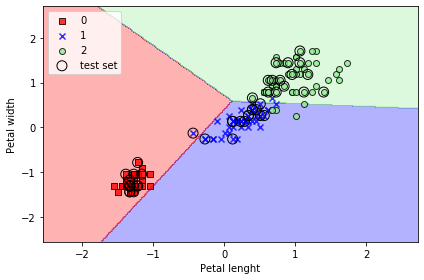

In [26]:
X_combinet_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combinet_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105, 150))

plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()